In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import csv
import matplotlib.ticker as mtick

In [23]:
def readSegmental(parent_path, path, num_app, mode, monitor_interval, isLatency):
    file_path = parent_path + path
    framesData = {"1": [], "2": [], "3":[]}
    reference = np.array([])
    for appNum in range(1,num_app+1):
        with open("%s-%d.csv" %(file_path, appNum), "r") as csv_file:
            data_reader = csv.reader(csv_file)
            for line in data_reader:
                data_temp = np.array(line, dtype=np.double)
                framesData[str(appNum)].append(data_temp)
#             data = np.array(data_temp)
#             if path == "inferenceDelay" or path == "backendDelay" or path == "e2eDelay":
#                 data = data - 14.75
#             if isLatency:
#                 data = data/framesData[appNum]
#             if appNum == 1:
#                 reference = data
#             else:
#                 reference += data
        framesData[str(appNum)] = np.array(framesData[str(appNum)])
    return framesData

In [5]:
parent_path = "./dds-baseline_new/"
# Need to start reading latency result
path_list = ["f1Score"]
baseline = {}
for path in path_list:
    baseline[path] = readSegmental(parent_path, path, 3, "baseline", "5", path !="f1Score")

NameError: name 'readSegmental' is not defined

In [3]:
def readData(parent_path, path, num_app, mode, monitor_interval, isLatency):
    file_path = parent_path + path
    framesData = {}
    if isLatency:
        # read those completed frames
        for appNum in range(1, num_app+1):
            with open("%scompletedFrames-%d.csv" %(parent_path, appNum), "r") as csv_file:
                data_reader = csv.reader(csv_file)
                data_reader = list(data_reader)
                data_temp = [int(val[0])//5 for val in data_reader]
                framesData[appNum] = np.array(data_temp)
    reference = np.array([])
    for appNum in range(1,num_app+1):
        with open("%s-%d.csv" %(file_path, appNum), "r") as csv_file:
            data_reader = csv.reader(csv_file)
            data_reader = list(data_reader)
            data_temp = [float(val[0]) for val in data_reader]
#             print(data_temp)
#             if mode == "concierge":
#                 if monitor_interval == "5":
#                     # take the first segment
#                     data_temp = [data_temp[4*i:4*(i+1)] for i in range(0,40,2)]
#                 else:
#                     # take the second segment
#                     data_temp = [data_temp[4*i:4*(i+1)] for i in range(1,40,2)]
            data = np.array(data_temp)
            if path == "inferenceDelay" or path == "backendDelay" or path == "e2eDelay":
                data = data - np.array([np.sum(baseline["inferenceDelay"][str(appNum)][i]) for i in range(20)])
            if isLatency:
                data = data/framesData[appNum]
            if appNum == 1:
                reference = data
            else:
                reference += data
    return reference/num_app

In [6]:
# Parameters
# E2E, encoding, backend (inference + other), completed frames, f1-score, transmission
# Algorithm: 

# Import all data
# for baseline, e2e = encoding + backend (do separation), and transmission
parent_path = "./dds-baseline-5/"
# Need to start reading latency result
path_list = ["f1Score"]
# baseline = {}
for path in path_list:
    baseline[path] = readData(parent_path, path, 3, "baseline", "5", path !="f1Score")
# # for concierge, we only consider e2e
# # keep being commented till later
parent_path = ["./dds-concierge-5/"]
path_list = ["f1Score"]
mis = ["5"]
concierge = {"5":{}}
for i in range(len(mis)):
    for path in path_list:
        concierge[mis[i]][path] = readData(parent_path[i], path, 3, "concierge", mis[i], path !="f1Score")
        print(path)

f1Score


In [7]:
baseline["f1Score"]

array([0.59233333, 0.62033333, 0.666     , 0.69866667, 0.72766667,
       0.764     , 0.78333333, 0.503     , 0.558     , 0.62533333,
       0.67233333, 0.70533333, 0.748     , 0.77133333, 0.22433333,
       0.27833333, 0.34933333, 0.41633333, 0.436     , 0.48366667,
       0.50433333, 0.598     , 0.629     , 0.662     , 0.70333333,
       0.73666667, 0.77033333, 0.79233333, 0.519     , 0.542     ,
       0.57033333, 0.58733333, 0.602     , 0.61633333, 0.635     ,
       0.73566667, 0.75766667, 0.78466667, 0.80833333, 0.816     ,
       0.83266667, 0.85166667, 0.531     , 0.57866667, 0.59666667,
       0.62933333, 0.65433333, 0.708     , 0.726     , 0.607     ,
       0.65066667, 0.71633333, 0.74233333, 0.76333333, 0.784     ,
       0.798     , 0.63266667, 0.664     , 0.71566667, 0.758     ,
       0.775     , 0.79866667, 0.81566667, 0.351     , 0.37733333,
       0.41666667, 0.45366667, 0.483     , 0.527     , 0.547     ])

In [8]:
concierge["5"]["f1Score"]

array([0.61      , 0.65233333, 0.69666667, 0.69166667, 0.74466667,
       0.768     , 0.78533333, 0.52266667, 0.60433333, 0.66166667,
       0.69066667, 0.708     , 0.74266667, 0.77566667, 0.28866667,
       0.316     , 0.379     , 0.42266667, 0.443     , 0.48      ,
       0.51066667, 0.60166667, 0.671     , 0.69366667, 0.70766667,
       0.741     , 0.76766667, 0.79233333, 0.528     , 0.55233333,
       0.567     , 0.58333333, 0.602     , 0.61566667, 0.628     ,
       0.72833333, 0.76266667, 0.781     , 0.80166667, 0.81366667,
       0.829     , 0.84966667, 0.53333333, 0.59433333, 0.631     ,
       0.63466667, 0.671     , 0.70466667, 0.732     , 0.60366667,
       0.65466667, 0.71766667, 0.73366667, 0.76433333, 0.783     ,
       0.80166667, 0.67133333, 0.71066667, 0.734     , 0.752     ,
       0.76066667, 0.79633333, 0.81133333, 0.381     , 0.43366667,
       0.44966667, 0.46333333, 0.491     , 0.525     , 0.551     ])

In [9]:
test = concierge["5"]["f1Score"] - baseline["f1Score"]
test

array([ 1.76666667e-02,  3.20000000e-02,  3.06666667e-02, -7.00000000e-03,
        1.70000000e-02,  4.00000000e-03,  2.00000000e-03,  1.96666667e-02,
        4.63333333e-02,  3.63333333e-02,  1.83333333e-02,  2.66666667e-03,
       -5.33333333e-03,  4.33333333e-03,  6.43333333e-02,  3.76666667e-02,
        2.96666667e-02,  6.33333333e-03,  7.00000000e-03, -3.66666667e-03,
        6.33333333e-03,  3.66666667e-03,  4.20000000e-02,  3.16666667e-02,
        4.33333333e-03,  4.33333333e-03, -2.66666667e-03, -2.22044605e-16,
        9.00000000e-03,  1.03333333e-02, -3.33333333e-03, -4.00000000e-03,
        0.00000000e+00, -6.66666667e-04, -7.00000000e-03, -7.33333333e-03,
        5.00000000e-03, -3.66666667e-03, -6.66666667e-03, -2.33333333e-03,
       -3.66666667e-03, -2.00000000e-03,  2.33333333e-03,  1.56666667e-02,
        3.43333333e-02,  5.33333333e-03,  1.66666667e-02, -3.33333333e-03,
        6.00000000e-03, -3.33333333e-03,  4.00000000e-03,  1.33333333e-03,
       -8.66666667e-03,  

In [29]:
baseline["e2eDelay"]

array([1.74605802, 1.66304224, 1.72560032, 1.70159286, 1.68789813,
       1.59903738, 1.66300954, 1.64135859, 1.66432236, 1.51629738,
       1.52189285, 1.5396433 , 1.77094124, 1.89656563, 1.96356248,
       1.99837044, 1.94861126, 1.90613952, 2.07016665, 2.09261487])

# Inference Processing

In [16]:
def readSegmental(parent_path, path, num_app, mode, monitor_interval, isLatency):
    file_path = parent_path + path
    framesData = {"1": [], "2": [], "3":[]}
    reference = np.array([])
    for appNum in range(1,num_app+1):
        with open("%s-%d.csv" %(file_path, appNum), "r") as csv_file:
            data_reader = csv.reader(csv_file)
            for line in data_reader:
                data_temp = np.array(line, dtype=np.double)
                framesData[str(appNum)].append(data_temp)
#             data = np.array(data_temp)
#             if path == "inferenceDelay" or path == "backendDelay" or path == "e2eDelay":
#                 data = data - 14.75
#             if isLatency:
#                 data = data/framesData[appNum]
#             if appNum == 1:
#                 reference = data
#             else:
#                 reference += data
        framesData[str(appNum)] = np.array(framesData[str(appNum)])
    return framesData

In [17]:
parent_path = "./baseline_optimized/"
# Need to start reading latency result
path_list = ["inferenceDelay"]
baseline = {}
for path in path_list:
    baseline[path] = readSegmental(parent_path, path, 3, "baseline", "5", path !="f1Score")

/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [42]:
test = [np.median(array) for array in baseline["inferenceDelay"]["1"]]
test
# for array in baseline["inferenceDelay"]["1"]:
#     print(array)

[1.1839320580475032,
 1.1687513535143808,
 1.1467718721251003,
 1.25401838804828,
 1.2148568410775624,
 1.2041180721134879,
 1.233807762968354,
 1.17787807690911,
 1.1520905569195747,
 1.210112767003011,
 1.0819540759548545,
 1.2393871540552936,
 1.1653543744469061,
 1.221548295026878,
 1.1554193985648453,
 1.337607786495937,
 1.195136026974069,
 1.1630355695087928,
 1.1338377930223942,
 1.039584554033354]

In [13]:
def readFrames(parent_path):
    framesData = {"1":[], "2":[], "3":[]}
    for appNum in range(1,4):
        with open("%scompletedFrames-%d.csv" %(parent_path, appNum), "r") as csv_file:
            data_reader = csv.reader(csv_file)
            data_reader = list(data_reader)
            data_temp = [int(val[0])//5 for val in data_reader]
            framesData[appNum] = np.array(data_temp)
    return framesData

In [ ]:
def readRaw(parent_path, path, num_app, mode, monitor_interval, isLatency):
    reference = {"1":[], "2":[], "3":[]}
    file_path = parent_path + path
    for appNum in range(1,num_app+1):
        with open("%s-%d.csv" %(file_path, appNum), "r") as csv_file:
            data_reader = csv.reader(csv_file)
            data_reader = list(data_reader)
            data_temp = [float(val[0]) for val in data_reader]
#             print(data_temp)
#             if mode == "concierge":
#                 if monitor_interval == "5":
#                     # take the first segment
#                     data_temp = [data_temp[4*i:4*(i+1)] for i in range(0,40,2)]
#                 else:
#                     # take the second segment
#                     data_temp = [data_temp[4*i:4*(i+1)] for i in range(1,40,2)]
            data = np.array(data_temp)
            reference[str(appNum)] = data
    return reference

In [ ]:
# baseline
parent_path = "./x_times_revised/"
path = "rawDelay"
framesData = readFrames(parent_path)
baseline["rawDelay"] = readRaw(parent_path, path, 3, 5, False)
pos1 = 0
pos2 = 0
pos3 = 0
for i in range(40):
    baseline["inferenceDelay"][i] -= np.mean(baseline["rawDelay"]["1"][pos1], baseline["rawDelay"]["2"][pos2], baseline["rawDelay"]["3"][pos3]) + 1.3
    pos1 += framesData["1"][i]
    pos2 += framesData["2"][i]
    pos3 += framesData["3"][i]

# concierge
parent_path = ["./concierge_10_5_skip/", "./concierge_10_15_skip/"]
for i in range(len(mis)):
    concierge[mis[i]][path] = readRaw(parent_path[i], path, 3, "concierge", mis[i], path !="f1Score")
    framesData = readFrames(parent_path)
    pos1 = 0
    pos2 = 0
    pos3 = 0
    for i in range(40):
        concierge[mis[i]]["inferenceDelay"][i] -= np.mean(concierge[mis[i]]["rawDelay"]["1"][pos1], concierge[mis[i]]["rawDelay"]["2"][pos2], concierge[mis[i]]["rawDelay"]["3"][pos3]) + 1.3
        pos1 += framesData["1"][i]
        pos2 += framesData["2"][i]
        pos3 += framesData["3"][i]

# F1-Score processing

In [4]:
test = np.array([concierge["5"]["f1Score"][i:80:4] for i in range(4)])
print(test)

test1 = np.array([baseline["f1Score"][i:100:4] for i in range(4)])
print(test1)

[[0.687      0.507      0.44433333 0.734      0.50066667 0.524
  0.52       0.65633333 0.57933333 0.512     ]
 [0.723      0.63133333 0.48466667 0.70233333 0.52       0.554
  0.62333333 0.694      0.592      0.60266667]
 [0.752      0.667      0.51033333 0.79133333 0.583      0.61033333
  0.66633333 0.75233333 0.61933333 0.67733333]
 [0.773      0.69066667 0.525      0.807      0.568      0.62266667
  0.68466667 0.763      0.64033333 0.70833333]]
[[0.55966667 0.454      0.30733333 0.719      0.48933333 0.512
  0.45266667 0.652      0.57733333 0.559     ]
 [0.693      0.598      0.45333333 0.76       0.516      0.55333333
  0.59533333 0.70433333 0.597      0.612     ]
 [0.74033333 0.66       0.50266667 0.785      0.55166667 0.58966667
  0.659      0.74866667 0.62266667 0.675     ]
 [0.76933333 0.69866667 0.53833333 0.80966667 0.56666667 0.60766667
  0.68933333 0.768      0.63566667 0.69666667]]


In [10]:
# classified by bandwidth and M1

# M1 = 5
# averaging baseline
numOfIteration = 10
numOfBandwidth = 7
totalExperiments = numOfIteration * numOfBandwidth
baseline_f1 = np.array([])
# for i in range(6):
#     for j in range(4):
#         baseline_f1 = np.append(baseline_f1, [max(baseline["f1Score"][(i*8)+j], baseline["f1Score"][(i*8)+j+4])])
baseline_f1_score = np.array([np.mean(baseline["f1Score"][i:totalExperiments:numOfBandwidth]) for i in range(numOfBandwidth)])
print(baseline_f1)
print(baseline_f1_score)

numOfIteration = 10
numOfBandwidth = 7
totalExperiments = numOfIteration * numOfBandwidth

# averaging concierge
# concierge_5_f1_score = np.array([np.mean(concierge["5"]["f1Score"][i:80:4]) for i in range(4)])
# improvement = concierge["5"]["f1Score"] - baseline["f1Score"]
# concierge_15_f1_score = np.array([np.mean(concierge["15"]["f1Score"][i:80:4]) for i in range(4)])
concierge_f1 = np.array([])
# for i in range(6):
#     for j in range(4):
#         concierge_f1 = np.append(concierge_f1, [max(concierge["5"]["f1Score"][(i*8)+j], concierge["5"]["f1Score"][(i*8)+j+4])])
concierge_5_f1_score = np.array([np.mean(concierge["5"]["f1Score"][i:totalExperiments:numOfBandwidth]) for i in range(numOfBandwidth)])
print(concierge_5_f1_score)
improvement = (concierge["5"]["f1Score"] - baseline["f1Score"])
print(improvement)
print(improvement[0:totalExperiments:7])
# print(baseline_f1_score)
# print(concierge_5_f1_score)
# print(concierge_15_f1_score)

# improvement_15_raw = concierge["15"]["f1Score"] - baseline["f1Score"]
# # for i in range(6):
# #     for j in range(4):
# #         concierge_f1 = np.append(concierge_f1, [max(concierge["5"]["f1Score"][(i*8)+j], concierge["5"]["f1Score"][(i*8)+j+4])])
# concierge_15_f1_score = np.array([np.mean(concierge["15"]["f1Score"][i:totalExperiments:4]) for i in range(4)])
# print(concierge_15_f1_score)

[]
[0.5294     0.5656     0.6103     0.64696667 0.66993333 0.70326667
 0.72246667]
[0.54686667 0.5952     0.63113333 0.64813333 0.67393333 0.7012
 0.72376667]
[ 1.76666667e-02  3.20000000e-02  3.06666667e-02 -7.00000000e-03
  1.70000000e-02  4.00000000e-03  2.00000000e-03  1.96666667e-02
  4.63333333e-02  3.63333333e-02  1.83333333e-02  2.66666667e-03
 -5.33333333e-03  4.33333333e-03  6.43333333e-02  3.76666667e-02
  2.96666667e-02  6.33333333e-03  7.00000000e-03 -3.66666667e-03
  6.33333333e-03  3.66666667e-03  4.20000000e-02  3.16666667e-02
  4.33333333e-03  4.33333333e-03 -2.66666667e-03 -2.22044605e-16
  9.00000000e-03  1.03333333e-02 -3.33333333e-03 -4.00000000e-03
  0.00000000e+00 -6.66666667e-04 -7.00000000e-03 -7.33333333e-03
  5.00000000e-03 -3.66666667e-03 -6.66666667e-03 -2.33333333e-03
 -3.66666667e-03 -2.00000000e-03  2.33333333e-03  1.56666667e-02
  3.43333333e-02  5.33333333e-03  1.66666667e-02 -3.33333333e-03
  6.00000000e-03 -3.33333333e-03  4.00000000e-03  1.33333333e

In [19]:
# improvement calculation
improvement_5 = (concierge_5_f1_score - baseline_f1_score)
print(concierge_5_f1_score)
print(baseline_f1_score)
# improvement_15 = concierge_15_f1_score - baseline_f1_score

print(improvement_5)


# # improvement calculation
# improvement_15 = concierge_15_f1_score - baseline_f1_score
# # improvement_15 = concierge_15_f1_score - baseline_f1_score
# print(improvement_15)

[0.54686667 0.5952     0.63113333 0.64813333 0.67393333 0.7012
 0.72376667]
[0.5294     0.5656     0.6103     0.64696667 0.66993333 0.70326667
 0.72246667]
[ 0.01746667  0.0296      0.02083333  0.00116667  0.004      -0.00206667
  0.0013    ]


In [8]:
print(improvement[0:24:4])
std1200 = abs(improvement[0:24:4] - improvement_5[0])
print(std1200)
std1200 = std1200**2
print(std1200)
std1200 = math.sqrt(sum(std1200)/6)
print(std1200)
print(std1200)

[ 0.12366667  0.08633333  0.13833333  0.02633333  0.00233333 -0.003     ]
[0.0756     0.03826667 0.09026667 0.02173333 0.04573333 0.05106667]
[0.00571536 0.00146434 0.00814807 0.00047234 0.00209154 0.0026078 ]
0.05845147401746864
0.05845147401746864


In [9]:
print(improvement[1:24:4])
std1500 = abs(improvement[1:24:4] - improvement_5[1])
print(std1500)
std1500 = std1500**2
print(std1500)
std1500 = math.sqrt(sum(std1500)/6)
print(std1500)

[ 0.09033333  0.08833333  0.10766667  0.01133333 -0.00066667 -0.012     ]
[0.0514     0.0494     0.06873333 0.0276     0.0396     0.05093333]
[0.00264196 0.00244036 0.00472427 0.00076176 0.00156816 0.0025942 ]
0.04954916002576896


In [10]:
print(improvement[2:24:4])
std1500 = abs(improvement[2:24:4] - improvement_5[2])
print(std1500)
std1500 = std1500**2
print(std1500)
std1500 = math.sqrt(sum(std1500)/6)
print(std1500)

[ 0.032       0.02633333  0.03666667 -0.00666667 -0.01033333 -0.00566667]
[0.02006667 0.0144     0.02473333 0.0186     0.02226667 0.0176    ]
[0.00040267 0.00020736 0.00061174 0.00034596 0.0004958  0.00030976]
0.019888410919148086


In [11]:
print(improvement[3:24:4])
std1500 = improvement[3:24:4] - improvement_5[3]
print(std1500)
std1500 = std1500**2
print(std1500)
std1500 = math.sqrt(sum(std1500)/6)
print(std1500)

[ 0.022       0.01466667  0.00433333  0.011      -0.00133333  0.        ]
[ 0.01463333  0.0073     -0.00303333  0.00363333 -0.0087     -0.00736667]
[2.14134444e-04 5.32900000e-05 9.20111111e-06 1.32011111e-05
 7.56900000e-05 5.42677778e-05]
0.00836445300507294


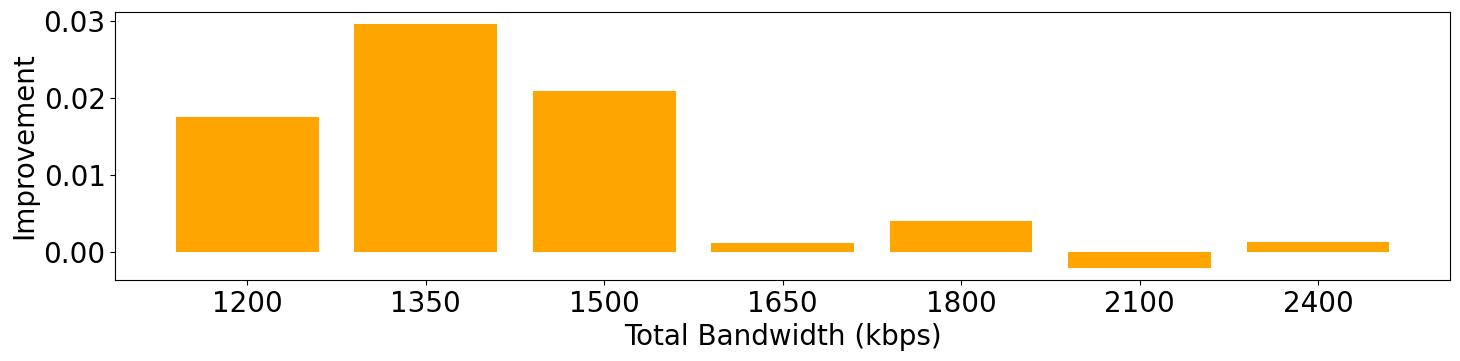

In [24]:
# plot the data
# need to plot using bar chart
x = ["1200", "1350", "1500", "1650", "1800", "2100", "2400"]
# x = ["900", "1050", "1200", "1350", "1500"]
plt.figure(figsize=(15, 4))
plt.rcParams.update({'font.size': 20})
y = improvement_5
# std = [0.03791177990487328, 0.03685956456606616, 0.02321409413840364, 0.017136859235123713]
# std = [0.04169006750288444, 0.047781136832823895, 0.02981672411645919, 0.0897782590746175]
plt.xlabel("Total Bandwidth (kbps)")
plt.ylabel("Improvement")
plt.bar(x, y, color="orange",label="Mean")
# plt.bar(x, std-y,bottom=y, color="blue", label="Std")
# plt.errorbar(x,y, yerr=std, fmt='o')
plt.tight_layout()
plt.savefig("average.png")
plt.show()

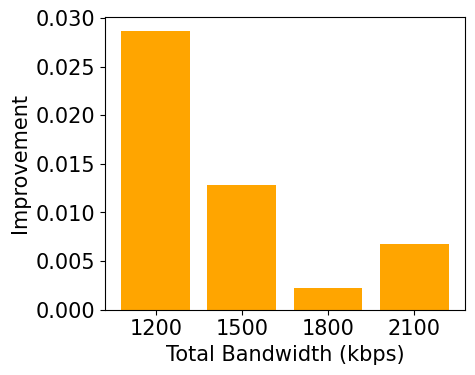

In [9]:
# plot the data
# need to plot using bar chart
x = ["1200", "1500", "1800", "2100"]
plt.figure(figsize=(5, 4))
plt.rcParams.update({'font.size': 15})
y = improvement_15
# std = [0.03791177990487328, 0.03685956456606616, 0.02321409413840364, 0.017136859235123713]
# std = [0.04169006750288444, 0.047781136832823895, 0.02981672411645919, 0.0897782590746175]
plt.xlabel("Total Bandwidth (kbps)")
plt.ylabel("Improvement")
plt.bar(x, y, color="orange",label="Mean")
# plt.bar(x, std-y,bottom=y, color="blue", label="Std")
# plt.errorbar(x,y, yerr=std, fmt='o')
plt.tight_layout()
plt.savefig("average.png")
plt.show()

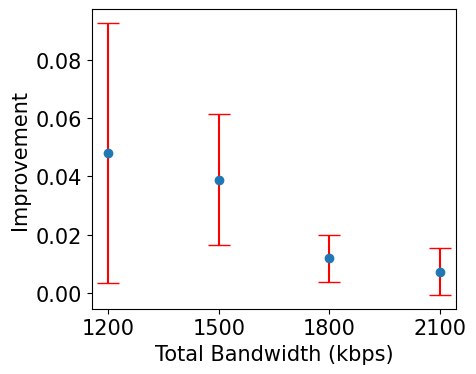

In [14]:
# plot the data
# need to plot using bar chart
x = ["1200", "1500", "1800", "2100"]
plt.figure(figsize=(5, 4))
plt.rcParams.update({'font.size': 15})
y = improvement_5
# std = [0.03791177990487328, 0.03685956456606616, 0.02321409413840364, 0.017136859235123713]
# std = [0.04169006750288444, 0.047781136832823895, 0.02981672411645919, 0.0897782590746175]
std = [0.044644031025130745, 0.02255090263995082, 0.00806225774829858, 0.008059386062455619]
plt.xlabel("Total Bandwidth (kbps)")
plt.ylabel("Improvement")
# plt.bar(x, y, color="orange",label="Mean")
# plt.bar(x, std-y,bottom=y, color="blue", label="Std")
plt.errorbar(x,y, yerr=std, linestyle='None', ecolor="red", marker='o', capsize=8, linewidth=1.5)
plt.tight_layout()
plt.savefig("scatter.png")
plt.show()

In [15]:
print(improvement[0:40:4])

[ 0.12366667  0.08633333  0.13833333  0.02633333  0.00233333 -0.003
  0.09033333  0.00066667 -0.00166667  0.01733333]


In [33]:
sens_one = [[0.26600000000000024, 0.267, 0.25099999999999967, 0.05700000000000002, 0.3260000000000002, 0.22600000000000015, 0.3730000000000002, 0.1480000000000003, 0.37199999999999966, 0.40200000000000014], [0.293, 0.28299999999999975, 0.30799999999999983, 0.09199999999999997, 0.32800000000000007, 0.14200000000000013, 0.369, 0.13700000000000007, 0.4610000000000003, 0.43299999999999983], [0.3360000000000001, 0.3340000000000001, 0.245, 0.12200000000000005, 0.32999999999999985, 0.14900000000000008, 0.4089999999999996, 0.13700000000000007, 0.41700000000000015, 0.4989999999999999], [0.3889999999999999, 0.33199999999999985, 0.32599999999999985, 0.10699999999999998, 0.36399999999999977, 0.18900000000000006, 0.4399999999999995, 0.1490000000000001, 0.4109999999999998, 0.5]]
sens_five = [[0.020999999999999998, 0.25000000000000017, 0.22399999999999998, 0.077, 0.3190000000000003, 0.11799999999999995, 0.352, 0.15799999999999997, 0.11599999999999977, 0.41500000000000004], [0.020999999999999998, 0.25000000000000017, 0.16600000000000015, 0.077, 0.123, 0.10199999999999992, 0.388, 0.26799999999999996, 0.09400000000000008, 0.41800000000000004], [0.020999999999999998, 0.25000000000000017, 0.29800000000000015, 0.06999999999999999, 0.1170000000000001, 0.21100000000000002, 0.42699999999999994, 0.29000000000000004, 0.10699999999999987, 0.31100000000000005], [0.020999999999999998, 0.28699999999999987, 0.261, 0.05600000000000001, 0.1280000000000001, 0.20999999999999996, 0.42099999999999993, 0.326, 0.09899999999999998, 0.24]]

/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == "":
/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


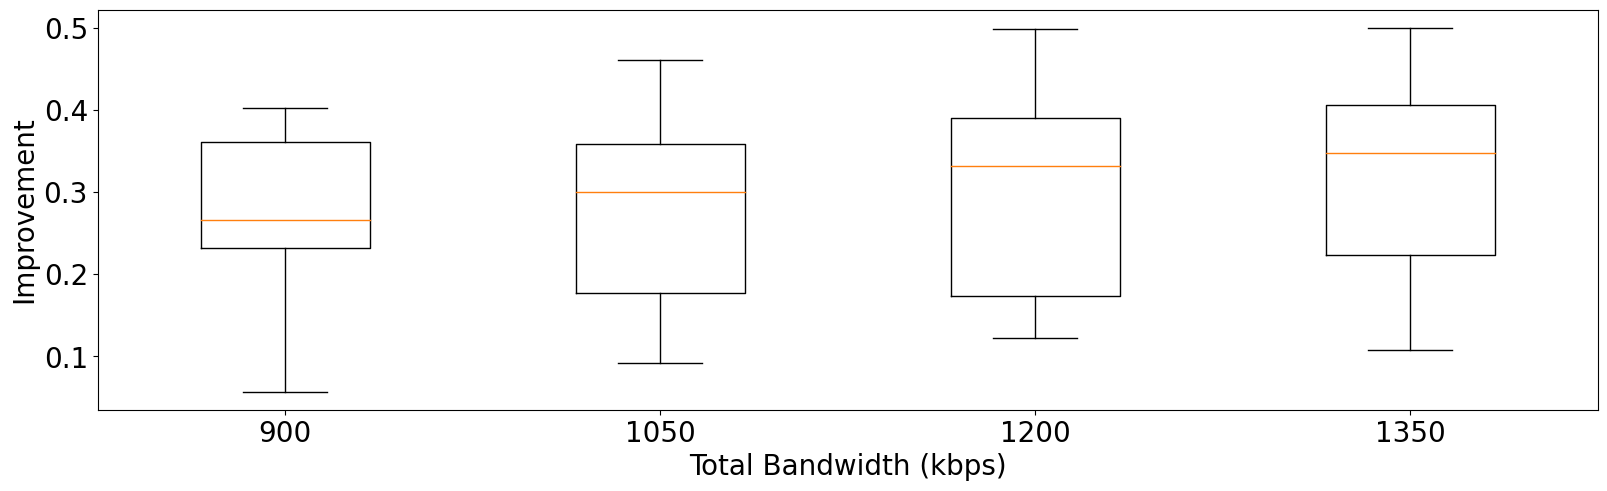

In [34]:
data_1 = sens_one[0]
data_2 = sens_one[1]
data_3 = sens_one[2]
data_4 = sens_one[3]


data = [data_1, data_2, data_3, data_4]
fig = plt.figure(figsize=(15, 4))
plt.rcParams.update({'font.size': 20})
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(["900","1050", "1200", "1350"])

ax.set_xlabel("Total Bandwidth (kbps)")
ax.set_ylabel("Improvement")
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.tight_layout()
plt.show()

Text(127.84722222222221, 0.5, 'Sensitivity')

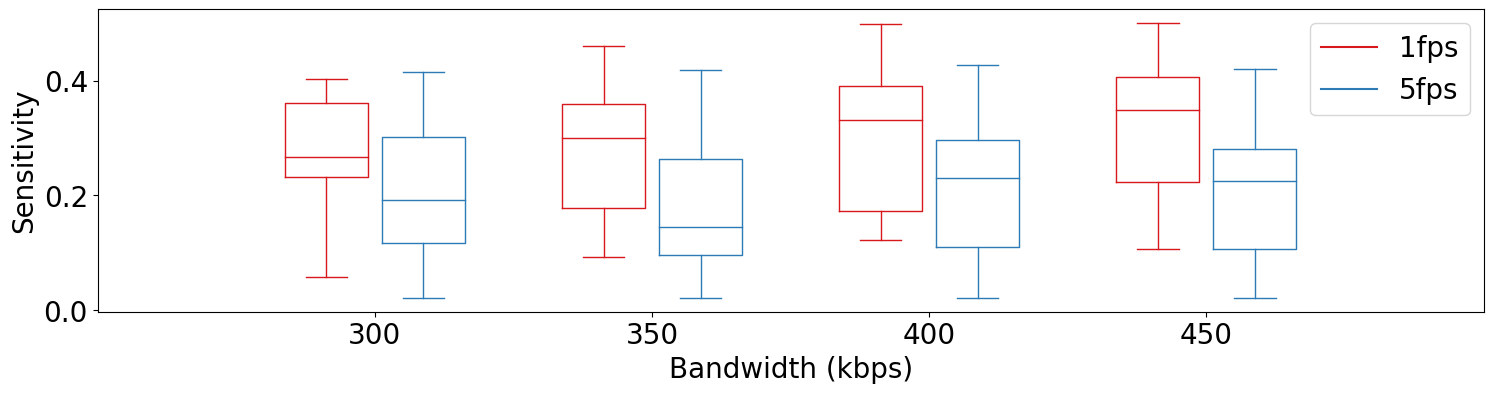

In [48]:
# import the matplotlib package
import matplotlib.pyplot as plt
 
# import the numpy package
import numpy as np
 
# create 2 - sample a 3-Dim array, that measures
# the summer and winter rain fall amount
# summer_rain = [[3, 5, 7], [15, 17, 12, 12, 15],
#                [26, 21, 15]]
# winter_rain = [[16, 14, 12], [31, 20, 25, 23, 28], 
#                [29, 31, 35, 41]]
 
# the list named ticks, summarizes or groups
# the summer and winter rainfall as low, mid
# and high
ticks = ["300","350", "400", "450"]
fig = plt.figure(figsize=(15, 4))
# ax.set_xticklabels(["900","1050", "1200", "1350"])
 
# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot
summer_rain_plot = plt.boxplot(sens_one,
                               positions=np.array(
    np.arange(len(sens_one)))*2.0-0.35, 
                               widths=0.6)
winter_rain_plot = plt.boxplot(sens_five,
                               positions=np.array(
    np.arange(len(sens_five)))*2.0+0.35,
                               widths=0.6)
 
# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
 
 
# setting colors for each groups
define_box_properties(summer_rain_plot, '#D7191C', '1fps')
define_box_properties(winter_rain_plot, '#2C7BB6', '5fps')

plt.rcParams.update({'font.size': 20})
plt.tight_layout()
# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
plt.xlabel("Bandwidth (kbps)")
plt.ylabel("Sensitivity")
 
# set the limit for y axis
# plt.ylim(0, 1)
 
# set the title

/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


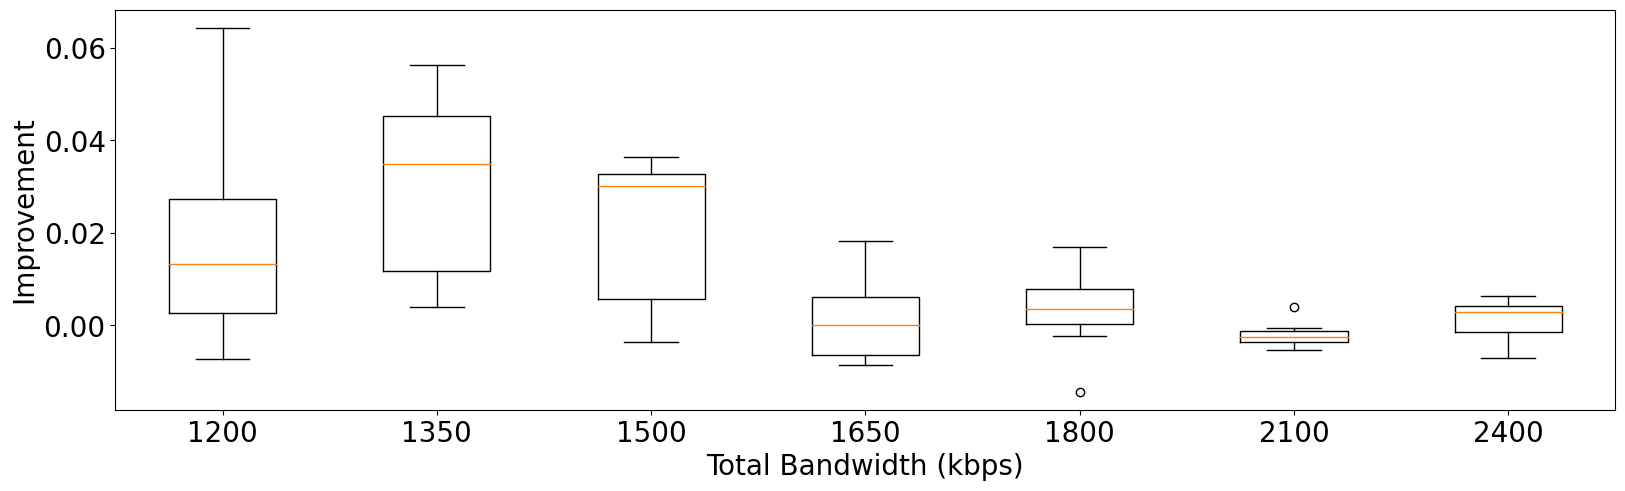

In [23]:
data_1 = improvement[0:totalExperiments:7]
data_2 = improvement[1:totalExperiments:7]
data_3 = improvement[2:totalExperiments:7]
data_4 = improvement[3:totalExperiments:7]
data_5 = improvement[4:totalExperiments:7]
data_6 = improvement[5:totalExperiments:7]
data_7 = improvement[6:totalExperiments:7]

data = [data_1, data_2, data_3, data_4, data_5, data_6, data_7]
fig = plt.figure(figsize=(15, 4))
plt.rcParams.update({'font.size': 20})
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(["1200", "1350", "1500", "1650", "1800", "2100", "2400"])

ax.set_xlabel("Total Bandwidth (kbps)")
ax.set_ylabel("Improvement")
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.tight_layout()
plt.show()

/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == "":
/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


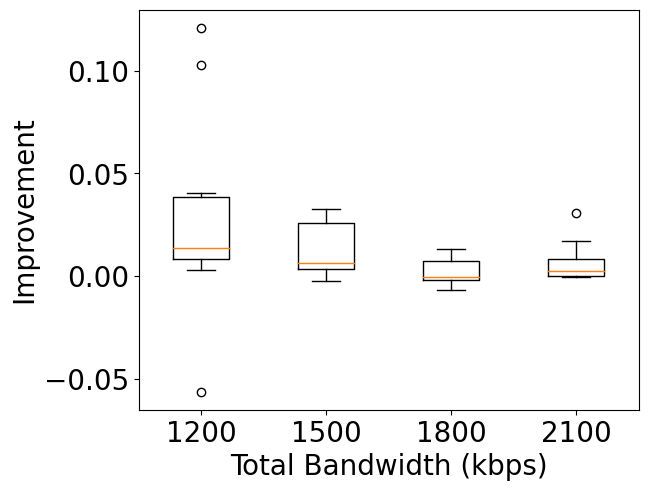

In [12]:
data_1 = improvement_15_raw[0:totalExperiments:4]
data_2 = improvement_15_raw[1:totalExperiments:4]
data_3 = improvement_15_raw[2:totalExperiments:4]
data_4 = improvement_15_raw[3:totalExperiments:4]

data = [data_1, data_2, data_3, data_4]
fig = plt.figure(figsize=(5, 4))
plt.rcParams.update({'font.size': 20})
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['1200', '1500',
                    '1800', '2100'])

ax.set_xlabel("Total Bandwidth (kbps)")
ax.set_ylabel("Improvement")
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.tight_layout()
plt.show()

In [7]:
# This would be latency processing
# baseline = encoding + backend + transmission, everything would be divided with completed frames each app
# (a + b + c)/3 / (f + g + h)/3 != (a/f + b/g + c/h)/3 -> this would be the perfect formula

baseline["e2eReal"] = baseline["encodingDelay"] + baseline["backendDelay"] + baseline["transmissionDelay"]
concierge["5"]["e2eReal"] = concierge["5"]["encodingDelay"] + concierge["5"]["backendDelay"] + concierge["5"]["transmissionDelay"] + concierge["5"]["profilingLatency"]

print(baseline["e2eDelay"])

print(concierge["5"]["e2eDelay"])
print(concierge["15"]["e2eDelay"])

overhead_5 = (concierge["5"]["e2eDelay"]-baseline["e2eDelay"]) *100 / baseline["e2eDelay"]
overhead_5 = np.array([np.mean(overhead_5[i:totalExperiments:4]) for i in range(4)])
print(overhead_5)

overhead_15 = (concierge["15"]["e2eDelay"]-baseline["e2eDelay"]) *100 / baseline["e2eDelay"]
overhead_15 = np.array([np.mean(overhead_15[i:totalExperiments:4]) for i in range(4)])
print(overhead_15)

[2.03154383 2.24100484 2.26863363 2.31104056 2.10962649 2.17108776
 2.22915188 2.27927136 1.98875248 2.11743856 2.17405587 2.26577098
 2.24425684 2.3013959  2.38156959 2.34994528 1.99775899 2.07983614
 2.20091743 2.25528087 2.09884613 2.04929761 2.17371298 2.18504395
 2.06626665 2.22449523 2.22420972 2.19477495 2.11518476 2.20248556
 2.26448839 2.24993434 1.98283934 2.06341587 2.11880705 2.26290627
 2.1489289  2.19895675 2.24447451 2.24314658]
[3.85969437 3.82959748 4.06845771 3.79567357 3.65038262 3.99643927
 4.29649153 3.87693429 3.8647683  3.62398766 3.64326878 3.98870689
 4.14197503 3.90943824 4.26127163 4.30090356 3.41279437 3.55793535
 4.12126098 3.39377797 3.52111524 3.82142708 4.35835752 3.57660765
 3.76738592 4.03943517 3.69851671 3.43221424 4.0623563  3.92972852
 4.3809258  3.71284735 3.20981686 3.57459147 3.87199105 3.6190682
 3.88721483 4.06832841 3.78468746 3.89015132]
[2.95277025 2.91303896 2.90346071 3.00556405 2.79869003 3.03352684
 2.99810378 3.05427129 2.88535989 2.62

In [8]:
# [113.07735949 111.20928555 119.71565658 134.48244002]
# [52.53832057 56.5857071  53.15253071 55.09995398]

In [9]:
# [105.9346225  106.39156347 106.96504309 103.9710353]
# [46.84865142 50.15285868 43.3909445  44.28211843]

<Figure size 2000x1600 with 0 Axes>

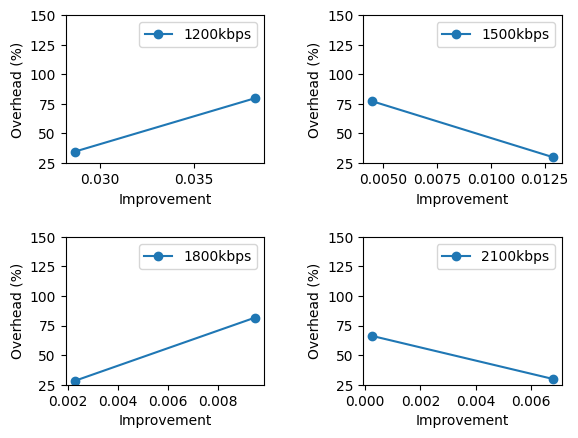

In [10]:
plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 10})
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
labs = [1200, 1500, 1800, 2100]
# reallocIndex = [i for i in range(len(log[1]["fid"]))]
# print(reallocIndex)
for i in range(4):
        axs[i//2, i%2].plot([improvement_15[i], improvement_5[i]], [overhead_15[i], overhead_5[i]], label=str(labs[i])+"kbps", marker="o")
        axs[i//2, i%2].set_ylim([25,150])
        axs[i//2, i%2].set_xlabel("Improvement")
        axs[i//2, i%2].set_ylabel("Overhead (%)")
        axs[i//2, i%2].legend()
plt.savefig("overhead.png")
plt.show()
# [0.04806667 0.03893333 0.01193333 0.00736667]
# [0.04056667 0.04073333 0.00853333 0.0066    ]

<Figure size 2000x1600 with 0 Axes>

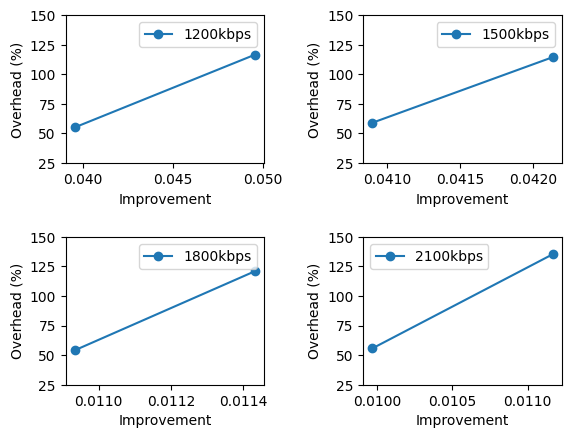

In [26]:
plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 10})
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
labs = [1200, 1500, 1800, 2100]
# reallocIndex = [i for i in range(len(log[1]["fid"]))]
# print(reallocIndex)
for i in range(4):
        axs[i//2, i%2].plot([improvement_15[i], improvement_5[i]], [overhead_15[i], overhead_5[i]], label=str(labs[i])+"kbps", marker="o")
        axs[i//2, i%2].set_ylim([25,150])
        axs[i//2, i%2].set_xlabel("Improvement")
        axs[i//2, i%2].set_ylabel("Overhead (%)")
        axs[i//2, i%2].legend()
plt.savefig("overhead.png")
plt.show()

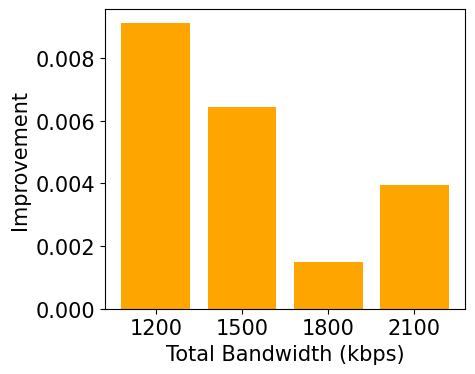

In [28]:
# Without Uav-1
# plot the data
# need to plot using bar chart
x = ["1200", "1500", "1800", "2100"]
plt.figure(figsize=(5, 4))
plt.rcParams.update({'font.size': 15})
y = np.array([])
y = np.append(y, [improvement[4*i:4*(i+1)] for i in range(3,6)])
y = np.append(y, [improvement[4*i:4*(i+1)] for i in range(7,10)])
m = y
z = np.array([np.mean(y[i:24:4]) for i in range(4)])
# std = [0.03791177990487328, 0.03685956456606616, 0.02321409413840364, 0.017136859235123713]
# std = [0.04169006750288444, 0.047781136832823895, 0.02981672411645919, 0.0897782590746175]
std = [0.044644031025130745, 0.02255090263995082, 0.00806225774829858, 0.008059386062455619]
plt.xlabel("Total Bandwidth (kbps)")
plt.ylabel("Improvement")
plt.bar(x, z, color="orange",label="Mean")
# plt.bar(x, std-y,bottom=y, color="blue", label="Std")
# plt.errorbar(x,y, yerr=std, fmt='o')
plt.tight_layout()
plt.savefig("average.png")
plt.show()

/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == "":
/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


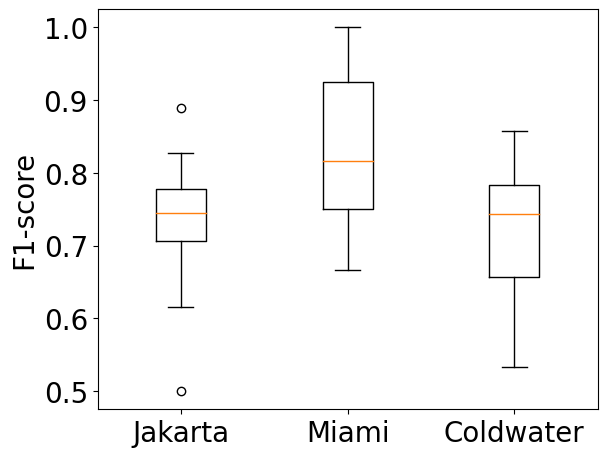

In [6]:
totalExperiments = 24
data_1 = [0.778, 0.5, 0.667, 0.762, 0.737, 0.778, 0.778, 0.741, 0.762, 0.75, 0.643, 0.889, 0.615, 0.72, 0.828, 0.741]
data_2 = [0.909, 0.8, 0.75, 0.667, 0.727, 0.727, 0.769, 0.933, 0.833, 0.909, 0.923, 1.0, 1.0, 0.75, 1.0, 0.8]
data_3 = [0.778, 0.857, 0.842, 0.533, 0.778, 0.778, 0.737, 0.706, 0.533, 0.8, 0.824, 0.667, 0.75, 0.625, 0.667, 0.533]

data = [data_1, data_2, data_3]
fig = plt.figure(figsize=(5, 4))
plt.rcParams.update({'font.size': 20})
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['Jakarta', 'Miami',
                    'Coldwater'])

# ax.set_xlabel("Videos")
ax.set_ylabel("F1-score")
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.tight_layout()
plt.show()

/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


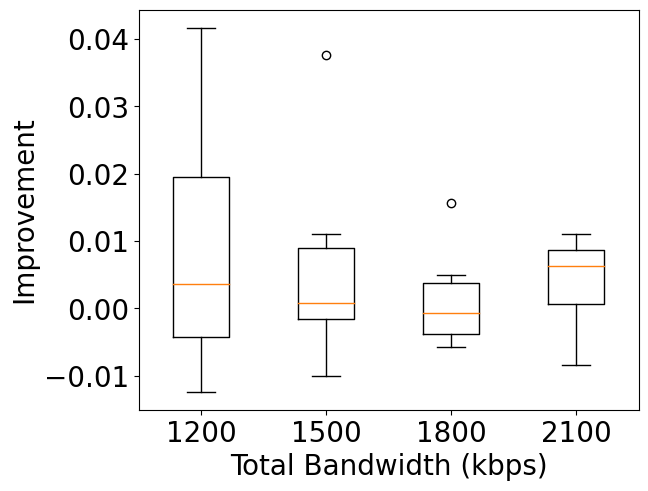

In [29]:
totalExperiments = 24
data_1 = m[0:totalExperiments:4]
data_2 = m[1:totalExperiments:4]
data_3 = m[2:totalExperiments:4]
data_4 = m[3:totalExperiments:4]

data = [data_1, data_2, data_3, data_4]
fig = plt.figure(figsize=(5, 4))
plt.rcParams.update({'font.size': 20})
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['1200', '1500',
                    '1800', '2100'])

ax.set_xlabel("Total Bandwidth (kbps)")
ax.set_ylabel("Improvement")
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.tight_layout()
plt.show()

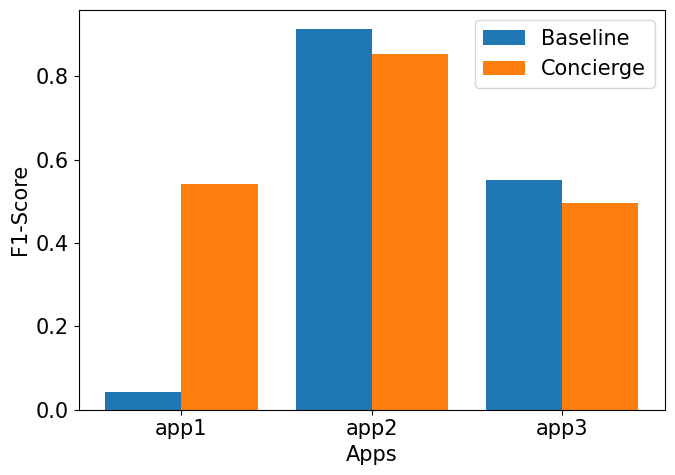

In [10]:
# plot the data
# need to plot using bar chart
x = ["app1", "app2", "app3"]
plt.figure(figsize=(7, 5))
plt.rcParams.update({'font.size': 15})
baseF1 = [0.042, 0.913, 0.551]
conF1 = [0.542, 0.854, 0.495]
X_axis = np.arange(len(x))
plt.bar(X_axis - 0.2, baseF1, 0.4, label = 'Baseline')
plt.bar(X_axis + 0.2, conF1, 0.4, label = 'Concierge')

plt.xticks(X_axis, x)
# std = [0.03791177990487328, 0.03685956456606616, 0.02321409413840364, 0.017136859235123713]
# std = [0.04169006750288444, 0.047781136832823895, 0.02981672411645919, 0.0897782590746175]
plt.xlabel("Apps")
plt.ylabel("F1-Score")
# plt.bar(x, y, color="orange",label="Mean")
# plt.bar(x, std-y,bottom=y, color="blue", label="Std")
# plt.errorbar(x,y, yerr=std, fmt='o')
plt.tight_layout()
plt.legend()
# plt.savefig("average.png")
plt.show()

In [20]:
numOfIteration = 10
numOfBandwidth = 4
totalExperiments = numOfIteration * numOfBandwidth
for path in path_list:
    baseline[path] = np.array([np.mean(baseline[path][i:totalExperiments:4]) for i in range(4)])
    for mi in mis:
        concierge[mi][path] = np.array([np.mean(concierge[mi][path][i:totalExperiments:4]) for i in range(4)])

        
# baseline = encoding + inference + (backend - inference) + transmission
# concierge = encoding + inference + (backend - inference) + transmission + profiling; profiling = e2eDelay - other

KeyError: 'profilingLatency'

[0.79734233 0.79525502 0.79784754]
[0.16713828 0.1710262  0.17604322]
[0.         0.38380139 0.8736786 ]
[0.75846092 0.75846092 0.75846092]


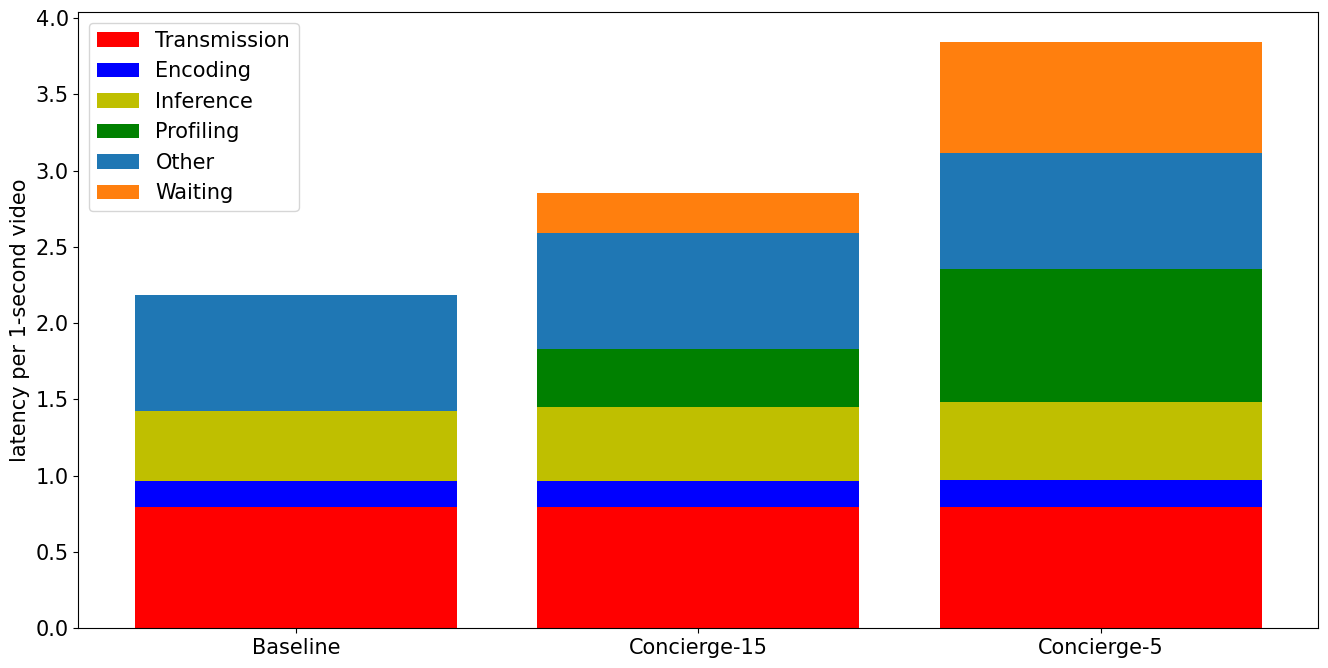

In [21]:
# Bar Plotting
y1 = np.array([np.mean(baseline["transmissionDelay"]), np.mean(concierge["15"]["transmissionDelay"]), np.mean(concierge["5"]["transmissionDelay"])])
print(y1)
y2 = np.array([np.mean(baseline["encodingDelay"]), np.mean(concierge["15"]["encodingDelay"]),np.mean(concierge["5"]["encodingDelay"])])
print(y2)
# y3 = np.array([np.mean(baseline["inferenceDelay"]), np.mean(concierge["15"]["inferenceDelay"]),np.mean(concierge["5"]["inferenceDelay"])])

y4 = np.array([0, np.mean(concierge["15"]["profilingLatency"]),np.mean(concierge["5"]["profilingLatency"])])
print(y4)
y5 = np.array([np.mean(baseline["e2eDelay"]) - y1[0] - y2[0] - y3[0] - y4[0], np.mean(baseline["e2eDelay"]) - y1[0] - y2[0] - y3[0] - y4[0],np.mean(baseline["e2eDelay"]) - y1[0] - y2[0] - y3[0] - y4[0]])
y5z = np.array([np.mean(baseline["e2eDelay"]) - y1[0] - y2[0] - y3[0] - y4[0], np.mean(concierge["15"]["e2eDelay"]) - y1[1] - y2[1] - y3[1] - y4[1],np.mean(concierge["5"]["e2eDelay"]) - y1[2] - y2[2] - y3[2] - y4[2]])
print(y5)
y6 = np.array([0, y5z[1]-y5[0], y5z[2]-y5[0]])


x = ["Baseline", "Concierge-15", "Concierge-5"]
plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 15})
plt.bar(x, y1, color='r', label="Transmission")
plt.bar(x, y2, bottom=y1, color='b', label="Encoding")
plt.bar(x, y3, bottom=y1+y2, color='y', label="Inference")
plt.bar(x, y4, bottom=y1+y2+y3, color='g', label="Profiling")
plt.bar(x, y5, bottom=y1+y2+y3+y4, label="Other")
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, label="Waiting")
plt.ylabel("latency per 1-second video")
plt.legend()

[0.78723044]
[0.27874393]
[0.53623637]
[0.16362551]
[1.17056176]


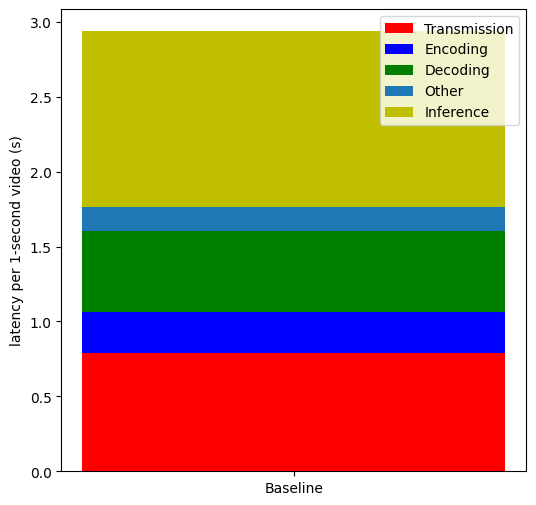

In [50]:
# Bar Plotting
y1 = np.array([np.mean(baseline["transmissionDelay"])])
print(y1)
y2 = np.array([np.mean(baseline["encodingDelay"])])
print(y2)
# y3 = np.array([np.median(np.array([baseline["inferenceDelay"]["1"],baseline["inferenceDelay"]["2"],baseline["inferenceDelay"]["3"]]))])
y4 = np.array([np.mean(baseline["decodeTime"])])
print(y4)
y5 = np.array([np.mean(baseline["e2eDelay"]) - y1[0] - y2[0] - y4[0]])
print(y5)
median_result_1 = [np.median(array) for array in baseline["inferenceDelay"]["1"]]
median_result_2 = [np.median(array) for array in baseline["inferenceDelay"]["2"]]
median_result_3 = [np.median(array) for array in baseline["inferenceDelay"]["3"]]
full = []
full += median_result_1 + median_result_2 + median_result_3
med = statistics.median(full)
y3 = np.array([med])
print(y3)
# y5z = np.array([np.mean(baseline["e2eDelay"]) - y1[0] - y2[0] - y3[0] - y4[0], np.mean(concierge["15"]["e2eDelay"]) - y1[1] - y2[1] - y3[1] - y4[1],np.mean(concierge["5"]["e2eDelay"]) - y1[2] - y2[2] - y3[2] - y4[2]])
# print(y5)
# y6 = np.array([0, y5z[1]-y5[0], y5z[2]-y5[0]])


x = ["Baseline"]
plt.figure(figsize=(6, 6))
plt.rcParams.update({'font.size': 10})
plt.bar(x, y1, color='r', label="Transmission")
plt.bar(x, y2, bottom=y1, color='b', label="Encoding")
plt.bar(x, y4, bottom=y1+y2, color='g', label="Decoding")
plt.bar(x, y5, bottom=y1+y2+y4, label="Other")
plt.bar(x, y3, bottom=y1+y2+y5+y4, color='y', label="Inference")
# plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, label="Waiting")
plt.ylabel("latency per 1-second video (s)")
plt.legend()

[0.203]
[0.0611652]
[0.0609348]
[0.5251]


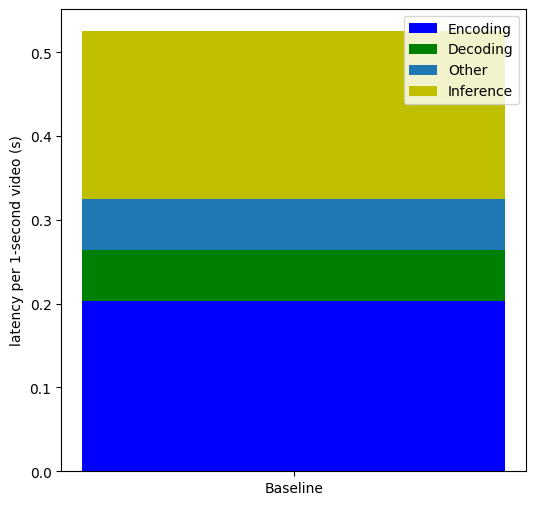

In [8]:
# Bar Plotting
# y1 = np.array([np.mean(baseline["transmissionDelay"])])
# print(y1)
y2 = np.array([20.3/100])
print(y2)
# y3 = np.array([np.median(np.array([baseline["inferenceDelay"]["1"],baseline["inferenceDelay"]["2"],baseline["inferenceDelay"]["3"]]))])
y4 = np.array([6.11652017920278/100])
print(y4)
y3 = np.array([0.2])
y5 = np.array([(133.88 - 18.2 - 63.17)/100 - y2[0] - y4[0] - y3[0]])
print(y5)
# median_result_1 = [np.median(array) for array in baseline["inferenceDelay"]["1"]]
# median_result_2 = [np.median(array) for array in baseline["inferenceDelay"]["2"]]
# median_result_3 = [np.median(array) for array in baseline["inferenceDelay"]["3"]]
# full = []
# full += median_result_1 + median_result_2 + median_result_3
# med = statistics.median(full)
# y5z = np.array([np.mean(baseline["e2eDelay"]) - y1[0] - y2[0] - y3[0] - y4[0], np.mean(concierge["15"]["e2eDelay"]) - y1[1] - y2[1] - y3[1] - y4[1],np.mean(concierge["5"]["e2eDelay"]) - y1[2] - y2[2] - y3[2] - y4[2]])
# print(y5)
# y6 = np.array([0, y5z[1]-y5[0], y5z[2]-y5[0]])

total = y2 + y4 + y5 + y3
print(total)
x = ["Baseline"]
plt.figure(figsize=(6, 6))
plt.rcParams.update({'font.size': 10})
# plt.bar(x, y1, color='r', label="Transmission")
plt.bar(x, y2, color='b', label="Encoding")
plt.bar(x, y4, bottom=y2, color='g', label="Decoding")
plt.bar(x, y5, bottom=y2+y4, label="Other")
plt.bar(x, y3, bottom=y2+y5+y4, color='y', label="Inference")
# plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, label="Waiting")
plt.ylabel("latency per 1-second video (s)")
plt.legend()

[0.203  0.2106]
[0.0611652 0.0586   ]
[0.0609348 0.0782   ]
[0.5251 0.7074]


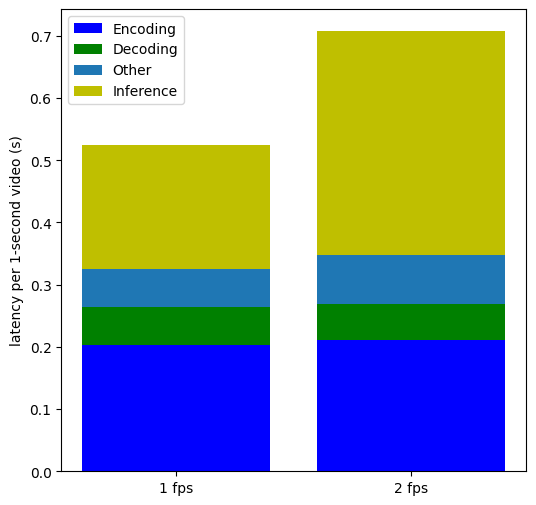

In [9]:
# Bar Plotting
# y1 = np.array([np.mean(baseline["transmissionDelay"])])
# print(y1)
segments = 50
y2 = np.append(y2,[10.53/segments])
print(y2)
# y3 = np.array([np.median(np.array([baseline["inferenceDelay"]["1"],baseline["inferenceDelay"]["2"],baseline["inferenceDelay"]["3"]]))])
y4 = np.append(y4, [2.93/segments])
print(y4)
y3 = np.append(y3, [0.36])
y5 = np.append(y5, [(91.32 - 18.8 - 37.15)/segments - y2[1] - y4[1] - y3[1]])
print(y5)
# median_result_1 = [np.median(array) for array in baseline["inferenceDelay"]["1"]]
# median_result_2 = [np.median(array) for array in baseline["inferenceDelay"]["2"]]
# median_result_3 = [np.median(array) for array in baseline["inferenceDelay"]["3"]]
# full = []
# full += median_result_1 + median_result_2 + median_result_3
# med = statistics.median(full)
# y5z = np.array([np.mean(baseline["e2eDelay"]) - y1[0] - y2[0] - y3[0] - y4[0], np.mean(concierge["15"]["e2eDelay"]) - y1[1] - y2[1] - y3[1] - y4[1],np.mean(concierge["5"]["e2eDelay"]) - y1[2] - y2[2] - y3[2] - y4[2]])
# print(y5)
# y6 = np.array([0, y5z[1]-y5[0], y5z[2]-y5[0]])

total = y2 + y4 + y5 + y3
print(total)
x = ["1 fps", "2 fps"]
plt.figure(figsize=(6, 6))
plt.rcParams.update({'font.size': 10})
# plt.bar(x, y1, color='r', label="Transmission")
plt.bar(x, y2, color='b', label="Encoding")
plt.bar(x, y4, bottom=y2, color='g', label="Decoding")
plt.bar(x, y5, bottom=y2+y4, label="Other")
plt.bar(x, y3, bottom=y2+y5+y4, color='y', label="Inference")
# plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, label="Waiting")
plt.ylabel("latency per 1-second video (s)")
plt.legend()

In [9]:
def readDataTwo(parent_path, path, num_app, mode, monitor_interval, isLatency):
    file_path = parent_path + path
    framesData = {}
    if isLatency:
        # read those completed frames
        for appNum in range(1, num_app+1):
            with open("%scompletedFrames-%d.csv" %(parent_path, appNum), "r") as csv_file:
                data_reader = csv.reader(csv_file)
                data_reader = list(data_reader)
                data_temp = [int(val[0])//5 for val in data_reader]
                framesData[appNum] = np.array(data_temp)
    reference = np.array([])
    for appNum in range(1,num_app+1):
        with open("%s-%d.csv" %(file_path, appNum), "r") as csv_file:
            data_reader = csv.reader(csv_file)
            data_reader = list(data_reader)
            data_temp = [float(val[0]) for val in data_reader]
#             print(data_temp)
#             if mode == "concierge":
#                 if monitor_interval == "5":
#                     # take the first segment
#                     data_temp = [data_temp[4*i:4*(i+1)] for i in range(0,40,2)]
#                 else:
#                     # take the second segment
#                     data_temp = [data_temp[4*i:4*(i+1)] for i in range(1,40,2)]
            data = np.array(data_temp)
            data = np.array([np.mean(data[i:len(data):6]) for i in range(3)])
            if isLatency:
                data = data/framesData[appNum]
            if appNum == 1:
                reference = data
            else:
                reference += data
    return reference/num_app

In [10]:
parent_path = "./x_times_revised/"
# Need to start reading latency result
path_list = ["f1Score"]
baseline = {}
for path in path_list:
    baseline[path] = readDataTwo(parent_path, path, 3, "baseline", "5", path !="f1Score")
print(baseline["f1Score"])

[0.55888889 0.56896296 0.544375  ]


In [ ]:
#[0.5793     0.6407     0.6819     0.71336667]

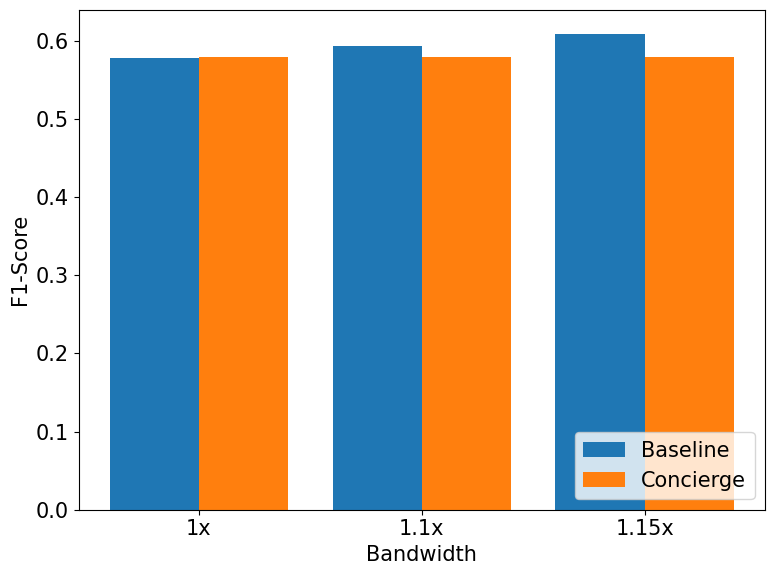

In [20]:
# plot the data
# need to plot using bar chart
x = ["1x", "1.1x", "1.15x"]
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})
baseF1 = [0.5778, 0.5934, 0.60917]
conF1 = [0.5794, 0.5794, 0.5794]
X_axis = np.arange(len(x))
plt.bar(X_axis - 0.2, baseF1, 0.4, label = 'Baseline')
plt.bar(X_axis + 0.2, conF1, 0.4, label = 'Concierge')

plt.xticks(X_axis, x)
# std = [0.03791177990487328, 0.03685956456606616, 0.02321409413840364, 0.017136859235123713]
# std = [0.04169006750288444, 0.047781136832823895, 0.02981672411645919, 0.0897782590746175]
plt.xlabel("Bandwidth")
plt.ylabel("F1-Score")
# plt.bar(x, y, color="orange",label="Mean")
# plt.bar(x, std-y,bottom=y, color="blue", label="Std")
# plt.errorbar(x,y, yerr=std, fmt='o')
plt.tight_layout()
plt.legend(loc="lower right")
# plt.savefig("average.png")
plt.show()

In [6]:
def readSegmental(parent_path, path, num_app, mode, monitor_interval, isLatency):
    file_path = parent_path + path
    framesData = {"1": [], "2": [], "3":[]}
    reference = np.array([])
    for appNum in range(1,num_app+1):
        with open("%s-%d.csv" %(file_path, appNum), "r") as csv_file:
            data_reader = csv.reader(csv_file)
            for line in data_reader:
                data_temp = np.array(line, dtype=np.double)
                framesData[str(appNum)].append(data_temp)
#             data = np.array(data_temp)
#             if path == "inferenceDelay" or path == "backendDelay" or path == "e2eDelay":
#                 data = data - 14.75
#             if isLatency:
#                 data = data/framesData[appNum]
#             if appNum == 1:
#                 reference = data
#             else:
#                 reference += data
        framesData[str(appNum)] = np.array(framesData[str(appNum)])
    return framesData

In [7]:
parent_path = "./segmental-baseline_10/"
# Need to start reading latency result
path_list = ["segmentalF1Score"]
baseline = {}
for path in path_list:
    baseline[path] = readSegmental(parent_path, path, 3, "baseline", "5", path !="f1Score")
# for concierge, we only consider e2e
# keep being commented till later
parent_path = ["./segmental-concierge_10_5_new/", "./segmental-concierge_10_15_new/"]
path_list = ["segmentalF1Score"]
mis = ["5", "15"]
concierge = {"5":{},"15":{}}
for i in range(len(mis)):
    for path in path_list:
        concierge[mis[i]][path] = readSegmental(parent_path[i], path, 3, "concierge", mis[i], path !="f1Score")
        print(path)
print(baseline["segmentalF1Score"])

segmentalF1Score
segmentalF1Score
{'1': array([array([0.904, 0.767, 0.857, 0.852, 0.818, 0.815, 0.737, 0.849, 0.903,
              0.836, 0.836, 0.841, 0.716, 0.784, 0.806, 0.915, 0.815])      ,
       array([0.939, 0.767, 0.875, 0.862, 0.87 , 0.833, 0.742, 0.865, 0.952,
              0.857, 0.847, 0.857, 0.765, 0.795, 0.831, 0.949, 0.852, 0.93 ]),
       array([0.941, 0.812, 0.875, 0.885, 0.87 , 0.868, 0.847, 0.892, 0.969,
              0.877, 0.893, 0.896, 0.833, 0.811, 0.882, 0.951, 0.852, 0.93 ,
              0.902])                                                       ,
       array([0.941, 0.812, 0.881, 0.915, 0.87 , 0.868, 0.847, 0.904, 0.969,
              0.897, 0.912, 0.896, 0.833, 0.835, 0.882, 0.952, 0.852, 0.93 ,
              0.96 , 0.8  ])                                                ,
       array([0.881, 0.831, 0.748, 0.732, 0.768, 0.781, 0.784, 0.783, 0.729,
              0.8  , 0.797, 0.768, 0.809, 0.814, 0.817, 0.772])             ,
       array([0.897, 0.848, 0.

/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [23]:
improvement_5 = []
baseline_5 = []
for i in range(40):
    temp = []
    temp_base = []
    for j in ["1", "2", "3"]:
        baselineLength = len(baseline["segmentalF1Score"][j][i])
        conLength = len(concierge["5"]["segmentalF1Score"][j][i])
        if(baselineLength > conLength):
            temp.append(concierge["5"]["segmentalF1Score"][j][i] - baseline["segmentalF1Score"][j][i][0:conLength])
            temp_base.append(baseline["segmentalF1Score"][j][i][0:conLength])
        else:
            temp.append(concierge["5"]["segmentalF1Score"][j][i][0:baselineLength] - baseline["segmentalF1Score"][j][i])
            temp_base.append(baseline["segmentalF1Score"][j][i])
    maxLength = max(len(temp[i]) for i in range(3))
    for j in range(3):
        temp[j] = np.append(temp[j], [0.0 for i in range(len(temp[j]), maxLength)])
        temp_base[j] = np.append(temp_base[j], [0.0 for i in range(len(temp_base[j]), maxLength)])
    improvement_5.append((temp[0] + temp[1] + temp[2])/3)
    baseline_5.append((temp_base[0] + temp_base[1] + temp_base[2])/3)
    if(i == 20 or i == 21):
        print((temp[0] + temp[1] + temp[2])/3)
        print(np.mean([temp[0], temp[1], temp[2]]))

[ 0.          0.          0.          0.          0.          0.
  0.00166667 -0.02       -0.02        0.006       0.         -0.03366667
  0.00666667  0.029      -0.09066667  0.02833333 -0.04033333 -0.04766667
 -0.09533333  0.        ]
-0.013800000000000002
[ 0.         -0.00366667  0.01666667  0.01366667  0.          0.012
  0.00133333 -0.02633333 -0.07433333 -0.036       0.01666667  0.00933333
  0.01233333  0.01533333 -0.02733333 -0.01566667 -0.05166667 -0.00833333
 -0.01766667  0.        ]
-0.008183333333333336


0.22066666666666668
0.39866666666666667


/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/cc/miniconda3/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


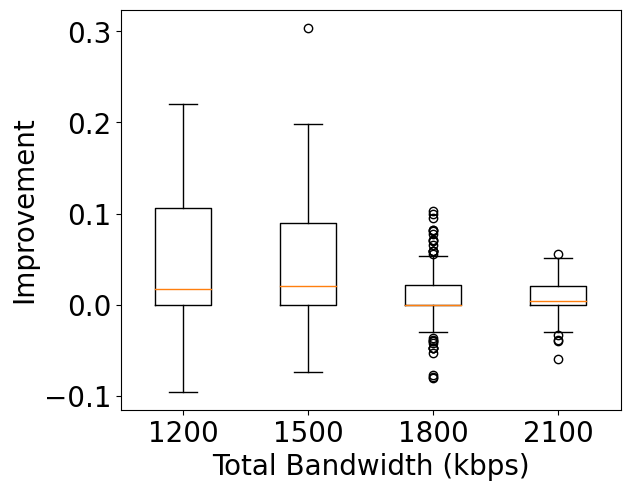

In [24]:
totalExperiments = 40
data_1 = improvement_5[0:totalExperiments:4]
data_baseline = baseline_5[0:totalExperiments:4]
data_final_1 = np.array([])
data_final_baseline = np.array([])
for data in data_1:
    data_final_1 = np.append(data_final_1, data)
for data in data_baseline:
    data_final_baseline = np.append(data_final_baseline, data)
print(data_final_1[128])
print(data_final_baseline[128])
data_2 = improvement_5[1:totalExperiments:4]
data_final_2 = np.array([])
for data in data_2:
    data_final_2 = np.append(data_final_2, data)
data_3 = improvement_5[2:totalExperiments:4]
data_final_3 = np.array([])
for data in data_3:
    data_final_3 = np.append(data_final_3, data)
data_4 = improvement_5[3:totalExperiments:4]
data_final_4 = np.array([])
for data in data_4:
    data_final_4 = np.append(data_final_4, data)

data = [data_final_1, data_final_2, data_final_3, data_final_4]
average = [np.mean(data_temp) for data_temp in data]
fig = plt.figure(figsize=(5, 4))
plt.rcParams.update({'font.size': 20})
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xticklabels(['1200', '1500',
                    '1800', '2100'])

ax.set_xlabel("Total Bandwidth (kbps)")
ax.set_ylabel("Improvement")
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.tight_layout()
plt.show()

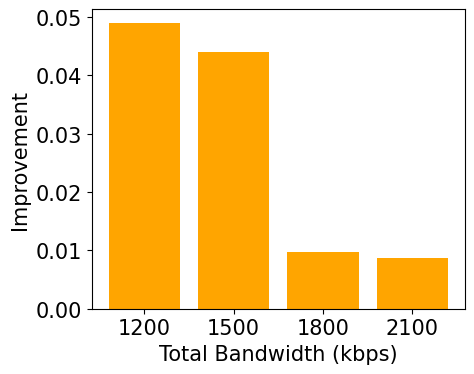

In [19]:
# Without Uav-1
# plot the data
# need to plot using bar chart
x = ["1200", "1500", "1800", "2100"]
plt.figure(figsize=(5, 4))
plt.rcParams.update({'font.size': 15})
# y = np.array([])
# y = np.append(y, [improvement[4*i:4*(i+1)] for i in range(3,6)])
# y = np.append(y, [improvement[4*i:4*(i+1)] for i in range(7,10)])
# m = y
# z = np.array([np.mean(y[i:24:4]) for i in range(4)])
# std = [0.03791177990487328, 0.03685956456606616, 0.02321409413840364, 0.017136859235123713]
# std = [0.04169006750288444, 0.047781136832823895, 0.02981672411645919, 0.0897782590746175]
std = [0.044644031025130745, 0.02255090263995082, 0.00806225774829858, 0.008059386062455619]
plt.xlabel("Total Bandwidth (kbps)")
plt.ylabel("Improvement")
plt.bar(x, average, color="orange",label="Mean")
# plt.bar(x, std-y,bottom=y, color="blue", label="Std")
# plt.errorbar(x,y, yerr=std, fmt='o')
plt.tight_layout()
plt.savefig("average.png")
plt.show()